# Setup Environment

In [4]:
# gym library for super mario bros 
!pip install gym_super_mario_bros==7.4.0

In [5]:
# NES-emulator and provides OpenAI-Gym interface
!pip install nes_py

In [39]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
# actions possible in 
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [10]:
# create environment for playing super mario
# (render_mode='human' forces env.render() to render env in human readable format)
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# map action_space of env to only 7 possible movements
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [11]:
# returns observation of type Box with {low, high, n-dim tuple, dtype}
env.observation_space.shape

(240, 256, 3)

In [5]:
env.action_space

Discrete(7)

In [6]:
# dummy run for 1000 steps
terminated = True
for _ in range(1000):
    if terminated:
        observation = env.reset()
    observation, reward, terminated, info = env.step(env.action_space.sample())
    env.render()
    
env.close()

C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


# Preprocessing environment

In [40]:
from gym.wrappers import GrayScaleObservation
from gym import wrappers
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
import matplotlib.pyplot as plt

In [95]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# map action_space of env to only 7 possible movements
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [96]:
env = GrayScaleObservation(env, keep_dim=True)
# vectorize environment 
env = DummyVecEnv([lambda: env])
# takes vectorized env and stacks 4 image observations on last dimension of image
env = VecFrameStack(env, 4, channels_order='last')

In [26]:
env.observation_space.shape

(240, 256, 4)

In [29]:
observation = env.reset()
#observation, reward, terminated, info = env.step(env.action_space.sample())

In [30]:
observation.shape

(1, 240, 256, 4)

In [36]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [46]:
observation, reward, terminated, info = env.step([2])

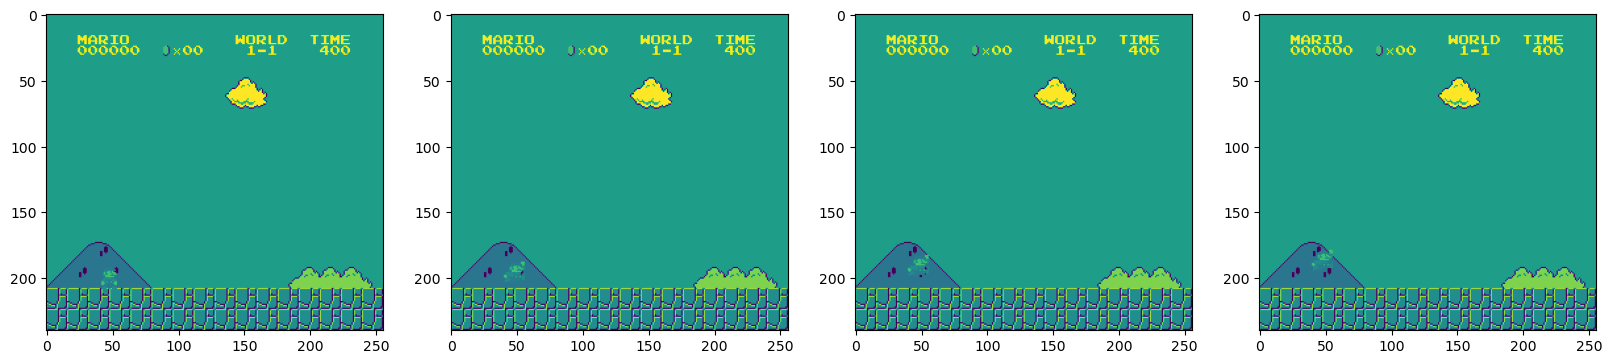

In [49]:
# frame stacking
plt.figure(figsize=(20,12))
for i in range(observation.shape[3]):
    plt.subplot(1,observation.shape[3],i+1)
    plt.imshow(observation[0][:,:,i])
    

# Training Reinforcement Learning Model

In [43]:
from stable_baselines3 import PPO

In [6]:
model = PPO("CnnPolicy", env, verbose=1, learning_rate=1e-6, n_steps=512, tensorboard_log='./logs/')

Using cuda device
Wrapping the env in a VecTransposeImage.


In [7]:
model.learn(total_timesteps=int(1e6), progress_bar=True)
model.save("mario_1e6")

Logging to ./logs/PPO_1


Output()

----------------------------
| time/              |     |
|    fps             | 75  |
|    iterations      | 1   |
|    time_elapsed    | 6   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 82            |
|    iterations           | 2             |
|    time_elapsed         | 12            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 3.9263512e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00122       |
|    learning_rate        | 1e-06         |
|    loss                 | 132           |
|    n_updates            | 10            |
|    policy_gradient_loss | -7.46e-05     |
|    value_loss           | 363           |
-------------------------------------------
-----

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 13          |
|    time_elapsed         | 72          |
|    total_timesteps      | 6656        |
| train/                  |             |
|    approx_kl            | 4.77063e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.0126      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0666      |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00052    |
|    value_loss           | 0.161       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 14          |
|    time_elapsed         | 78          |
|    total_timesteps      | 7168  

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 24          |
|    time_elapsed         | 133         |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 9.43254e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | -0.00655    |
|    learning_rate        | 1e-06       |
|    loss                 | 0.22        |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.000874   |
|    value_loss           | 0.844       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 25           |
|    time_elapsed         | 138          |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 35            |
|    time_elapsed         | 194           |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 6.0421997e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0416        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.147         |
|    n_updates            | 340           |
|    policy_gradient_loss | -0.000195     |
|    value_loss           | 1.71          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 36            |
|    time_elapsed         | 200 

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 46            |
|    time_elapsed         | 257           |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 3.6657322e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | -0.0102       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.043         |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.000236     |
|    value_loss           | 0.1           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 47            |
|    time_elapsed         | 263 

--------------------------------------------
| time/                   |                |
|    fps                  | 91             |
|    iterations           | 57             |
|    time_elapsed         | 320            |
|    total_timesteps      | 29184          |
| train/                  |                |
|    approx_kl            | 0.000102446764 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.92          |
|    explained_variance   | 0.055          |
|    learning_rate        | 1e-06          |
|    loss                 | 0.18           |
|    n_updates            | 560            |
|    policy_gradient_loss | -0.000927      |
|    value_loss           | 0.65           |
--------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 58            |
|    time_elap

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 68           |
|    time_elapsed         | 382          |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 8.290715e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.92        |
|    explained_variance   | -0.0094      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0942       |
|    n_updates            | 670          |
|    policy_gradient_loss | 0.000179     |
|    value_loss           | 1.68         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 69           |
|    time_elapsed         | 387          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 80           |
|    time_elapsed         | 449          |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 6.480003e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | 0.258        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0516       |
|    n_updates            | 790          |
|    policy_gradient_loss | -0.000351    |
|    value_loss           | 0.169        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 81            |
|    time_elapsed         | 455           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 91            |
|    time_elapsed         | 511           |
|    total_timesteps      | 46592         |
| train/                  |               |
|    approx_kl            | 6.3348794e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | -0.00932      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0817        |
|    n_updates            | 900           |
|    policy_gradient_loss | -0.000361     |
|    value_loss           | 0.266         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 92          |
|    time_elapsed         | 516         

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 102           |
|    time_elapsed         | 572           |
|    total_timesteps      | 52224         |
| train/                  |               |
|    approx_kl            | 6.0105813e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.00683       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.06          |
|    n_updates            | 1010          |
|    policy_gradient_loss | -6.44e-05     |
|    value_loss           | 0.342         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 103          |
|    time_elapsed         | 578     

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 113          |
|    time_elapsed         | 635          |
|    total_timesteps      | 57856        |
| train/                  |              |
|    approx_kl            | 0.0015754867 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.113        |
|    learning_rate        | 1e-06        |
|    loss                 | 91.1         |
|    n_updates            | 1120         |
|    policy_gradient_loss | -0.000975    |
|    value_loss           | 329          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 114          |
|    time_elapsed         | 641          |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 124           |
|    time_elapsed         | 696           |
|    total_timesteps      | 63488         |
| train/                  |               |
|    approx_kl            | 3.7072226e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | -0.0147       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0719        |
|    n_updates            | 1230          |
|    policy_gradient_loss | -0.000141     |
|    value_loss           | 0.191         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 125          |
|    time_elapsed         | 701     

-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 135         |
|    time_elapsed         | 755         |
|    total_timesteps      | 69120       |
| train/                  |             |
|    approx_kl            | 0.000199756 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.87       |
|    explained_variance   | -0.0049     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0524      |
|    n_updates            | 1340        |
|    policy_gradient_loss | -0.000574   |
|    value_loss           | 0.172       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 136          |
|    time_elapsed         | 761          |
|    total_timesteps      | 6

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 146           |
|    time_elapsed         | 816           |
|    total_timesteps      | 74752         |
| train/                  |               |
|    approx_kl            | 0.00048321707 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0244       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.191         |
|    n_updates            | 1450          |
|    policy_gradient_loss | -0.000903     |
|    value_loss           | 2.65          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 147          |
|    time_elapsed         | 821     

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 157           |
|    time_elapsed         | 874           |
|    total_timesteps      | 80384         |
| train/                  |               |
|    approx_kl            | 0.00019237166 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.84         |
|    explained_variance   | 0.00876       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0473        |
|    n_updates            | 1560          |
|    policy_gradient_loss | -0.000799     |
|    value_loss           | 0.144         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 158           |
|    time_elapsed         | 879 

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 168          |
|    time_elapsed         | 934          |
|    total_timesteps      | 86016        |
| train/                  |              |
|    approx_kl            | 0.0002859285 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.0127       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0582       |
|    n_updates            | 1670         |
|    policy_gradient_loss | -0.000758    |
|    value_loss           | 0.186        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 169           |
|    time_elapsed         | 939           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 179          |
|    time_elapsed         | 993          |
|    total_timesteps      | 91648        |
| train/                  |              |
|    approx_kl            | 0.0001934868 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.84        |
|    explained_variance   | 0.0165       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.121        |
|    n_updates            | 1780         |
|    policy_gradient_loss | -0.000678    |
|    value_loss           | 0.793        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 180          |
|    time_elapsed         | 998          |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 190           |
|    time_elapsed         | 1051          |
|    total_timesteps      | 97280         |
| train/                  |               |
|    approx_kl            | 0.00015660422 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | -0.0196       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0687        |
|    n_updates            | 1890          |
|    policy_gradient_loss | -0.000195     |
|    value_loss           | 1.11          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 191          |
|    time_elapsed         | 1057    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 201          |
|    time_elapsed         | 1111         |
|    total_timesteps      | 102912       |
| train/                  |              |
|    approx_kl            | 0.0014259518 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.83        |
|    explained_variance   | 0.355        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 2000         |
|    policy_gradient_loss | 0.00166      |
|    value_loss           | 335          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 202          |
|    time_elapsed         | 1116         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 212          |
|    time_elapsed         | 1171         |
|    total_timesteps      | 108544       |
| train/                  |              |
|    approx_kl            | 0.0002457985 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.8         |
|    explained_variance   | -0.00744     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0719       |
|    n_updates            | 2110         |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 0.158        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 213           |
|    time_elapsed         | 1178          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 223          |
|    time_elapsed         | 1240         |
|    total_timesteps      | 114176       |
| train/                  |              |
|    approx_kl            | 0.0003028413 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.78        |
|    explained_variance   | 0.0108       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0813       |
|    n_updates            | 2220         |
|    policy_gradient_loss | -0.00133     |
|    value_loss           | 0.286        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 224         |
|    time_elapsed         | 1247        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 234           |
|    time_elapsed         | 1308          |
|    total_timesteps      | 119808        |
| train/                  |               |
|    approx_kl            | 0.00071282894 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | 0.00803       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.187         |
|    n_updates            | 2330          |
|    policy_gradient_loss | -0.0019       |
|    value_loss           | 1.26          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 235           |
|    time_elapsed         | 1314

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 246          |
|    time_elapsed         | 1374         |
|    total_timesteps      | 125952       |
| train/                  |              |
|    approx_kl            | 0.0001225255 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.8         |
|    explained_variance   | -0.0149      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.052        |
|    n_updates            | 2450         |
|    policy_gradient_loss | -0.000437    |
|    value_loss           | 0.146        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 247           |
|    time_elapsed         | 1379          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 257          |
|    time_elapsed         | 1434         |
|    total_timesteps      | 131584       |
| train/                  |              |
|    approx_kl            | 0.0001263537 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.00303     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.05         |
|    n_updates            | 2560         |
|    policy_gradient_loss | -0.00018     |
|    value_loss           | 0.112        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 258           |
|    time_elapsed         | 1440          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 268           |
|    time_elapsed         | 1495          |
|    total_timesteps      | 137216        |
| train/                  |               |
|    approx_kl            | 0.00014235091 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | 0.0289        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.16          |
|    n_updates            | 2670          |
|    policy_gradient_loss | -0.00043      |
|    value_loss           | 0.598         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 269         |
|    time_elapsed         | 1501        

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 279          |
|    time_elapsed         | 1555         |
|    total_timesteps      | 142848       |
| train/                  |              |
|    approx_kl            | 3.459642e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | -0.0214      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0496       |
|    n_updates            | 2780         |
|    policy_gradient_loss | -8.89e-05    |
|    value_loss           | 0.102        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 280          |
|    time_elapsed         | 1561         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 290           |
|    time_elapsed         | 1618          |
|    total_timesteps      | 148480        |
| train/                  |               |
|    approx_kl            | 0.00011533871 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.71         |
|    explained_variance   | -0.0142       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0513        |
|    n_updates            | 2890          |
|    policy_gradient_loss | -0.000328     |
|    value_loss           | 0.126         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 291           |
|    time_elapsed         | 1624

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 301           |
|    time_elapsed         | 1683          |
|    total_timesteps      | 154112        |
| train/                  |               |
|    approx_kl            | 0.00047518162 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.67         |
|    explained_variance   | 0.0043        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0474        |
|    n_updates            | 3000          |
|    policy_gradient_loss | -0.00122      |
|    value_loss           | 0.153         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 302           |
|    time_elapsed         | 1688

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 312           |
|    time_elapsed         | 1744          |
|    total_timesteps      | 159744        |
| train/                  |               |
|    approx_kl            | 0.00015399035 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.62         |
|    explained_variance   | 0.85          |
|    learning_rate        | 1e-06         |
|    loss                 | 8.21          |
|    n_updates            | 3110          |
|    policy_gradient_loss | -0.00061      |
|    value_loss           | 16.7          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 313          |
|    time_elapsed         | 1749    

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 323           |
|    time_elapsed         | 1805          |
|    total_timesteps      | 165376        |
| train/                  |               |
|    approx_kl            | 0.00063815527 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.6          |
|    explained_variance   | -0.0662       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0387        |
|    n_updates            | 3220          |
|    policy_gradient_loss | -0.00135      |
|    value_loss           | 0.0996        |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 324           |
|    time_elapsed         | 1810

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 334           |
|    time_elapsed         | 1865          |
|    total_timesteps      | 171008        |
| train/                  |               |
|    approx_kl            | 0.00029133004 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.49         |
|    explained_variance   | 0.03          |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0881        |
|    n_updates            | 3330          |
|    policy_gradient_loss | -0.000329     |
|    value_loss           | 0.559         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 335           |
|    time_elapsed         | 1871

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 345           |
|    time_elapsed         | 1925          |
|    total_timesteps      | 176640        |
| train/                  |               |
|    approx_kl            | 0.00017109595 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.49         |
|    explained_variance   | -0.05         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.118         |
|    n_updates            | 3440          |
|    policy_gradient_loss | -5.27e-05     |
|    value_loss           | 0.91          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 346           |
|    time_elapsed         | 1931

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 356          |
|    time_elapsed         | 1986         |
|    total_timesteps      | 182272       |
| train/                  |              |
|    approx_kl            | 0.0003195298 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.56        |
|    explained_variance   | -0.0803      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0449       |
|    n_updates            | 3550         |
|    policy_gradient_loss | -0.000569    |
|    value_loss           | 0.124        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 357         |
|    time_elapsed         | 1991        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 368           |
|    time_elapsed         | 2052          |
|    total_timesteps      | 188416        |
| train/                  |               |
|    approx_kl            | 0.00086797785 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.61         |
|    explained_variance   | 0.00081       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.125         |
|    n_updates            | 3670          |
|    policy_gradient_loss | -0.00175      |
|    value_loss           | 0.295         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 369          |
|    time_elapsed         | 2057    

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 379           |
|    time_elapsed         | 2111          |
|    total_timesteps      | 194048        |
| train/                  |               |
|    approx_kl            | 0.00028029212 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.63         |
|    explained_variance   | -0.198        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0738        |
|    n_updates            | 3780          |
|    policy_gradient_loss | -0.000498     |
|    value_loss           | 0.246         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 380          |
|    time_elapsed         | 2117    

------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 390          |
|    time_elapsed         | 2172         |
|    total_timesteps      | 199680       |
| train/                  |              |
|    approx_kl            | 0.0024212745 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.6         |
|    explained_variance   | 0.658        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 3890         |
|    policy_gradient_loss | 0.000189     |
|    value_loss           | 337          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 391           |
|    time_elapsed         | 2178          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 401           |
|    time_elapsed         | 2233          |
|    total_timesteps      | 205312        |
| train/                  |               |
|    approx_kl            | 0.00015705102 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.64         |
|    explained_variance   | -0.0113       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.07          |
|    n_updates            | 4000          |
|    policy_gradient_loss | -0.000816     |
|    value_loss           | 0.139         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 402          |
|    time_elapsed         | 2238    

-------------------------------------------
| time/                   |               |
|    fps                  | 91            |
|    iterations           | 412           |
|    time_elapsed         | 2293          |
|    total_timesteps      | 210944        |
| train/                  |               |
|    approx_kl            | 0.00075437664 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.63         |
|    explained_variance   | -0.118        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0829        |
|    n_updates            | 4110          |
|    policy_gradient_loss | -0.00159      |
|    value_loss           | 0.263         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 91          |
|    iterations           | 413         |
|    time_elapsed         | 2298        

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 423           |
|    time_elapsed         | 2353          |
|    total_timesteps      | 216576        |
| train/                  |               |
|    approx_kl            | 0.00010788499 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.61         |
|    explained_variance   | -0.0104       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.17          |
|    n_updates            | 4220          |
|    policy_gradient_loss | -0.000107     |
|    value_loss           | 0.794         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 424          |
|    time_elapsed         | 2358    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 434           |
|    time_elapsed         | 2413          |
|    total_timesteps      | 222208        |
| train/                  |               |
|    approx_kl            | 0.00046130153 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.6          |
|    explained_variance   | 0.00755       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0442        |
|    n_updates            | 4330          |
|    policy_gradient_loss | -0.000953     |
|    value_loss           | 0.102         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 435           |
|    time_elapsed         | 2418

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 445          |
|    time_elapsed         | 2473         |
|    total_timesteps      | 227840       |
| train/                  |              |
|    approx_kl            | 0.0011360475 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.51        |
|    explained_variance   | 0.0247       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0565       |
|    n_updates            | 4440         |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 0.0991       |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 446           |
|    time_elapsed         | 2479          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 456           |
|    time_elapsed         | 2534          |
|    total_timesteps      | 233472        |
| train/                  |               |
|    approx_kl            | 0.00029146997 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -0.0658       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.109         |
|    n_updates            | 4550          |
|    policy_gradient_loss | -0.000425     |
|    value_loss           | 0.419         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 457          |
|    time_elapsed         | 2539    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 467           |
|    time_elapsed         | 2594          |
|    total_timesteps      | 239104        |
| train/                  |               |
|    approx_kl            | 0.00030952506 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.39         |
|    explained_variance   | -0.095        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.119         |
|    n_updates            | 4660          |
|    policy_gradient_loss | -0.00076      |
|    value_loss           | 0.763         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 468           |
|    time_elapsed         | 2599

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 479           |
|    time_elapsed         | 2660          |
|    total_timesteps      | 245248        |
| train/                  |               |
|    approx_kl            | 0.00028375792 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -0.00229      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.142         |
|    n_updates            | 4780          |
|    policy_gradient_loss | -0.000376     |
|    value_loss           | 0.185         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 480          |
|    time_elapsed         | 2666    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 490          |
|    time_elapsed         | 2721         |
|    total_timesteps      | 250880       |
| train/                  |              |
|    approx_kl            | 0.0013237138 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | -0.0884      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.132        |
|    n_updates            | 4890         |
|    policy_gradient_loss | -0.00185     |
|    value_loss           | 0.26         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 491          |
|    time_elapsed         | 2726         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 501           |
|    time_elapsed         | 2782          |
|    total_timesteps      | 256512        |
| train/                  |               |
|    approx_kl            | 0.00029864977 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.29         |
|    explained_variance   | 0.825         |
|    learning_rate        | 1e-06         |
|    loss                 | 110           |
|    n_updates            | 5000          |
|    policy_gradient_loss | -0.000959     |
|    value_loss           | 187           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 502         |
|    time_elapsed         | 2787        

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 512          |
|    time_elapsed         | 2843         |
|    total_timesteps      | 262144       |
| train/                  |              |
|    approx_kl            | 0.0010811524 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.41        |
|    explained_variance   | -0.0773      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0499       |
|    n_updates            | 5110         |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 0.12         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 513          |
|    time_elapsed         | 2848         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 523          |
|    time_elapsed         | 2903         |
|    total_timesteps      | 267776       |
| train/                  |              |
|    approx_kl            | 0.0013647124 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.37        |
|    explained_variance   | 0.0163       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.212        |
|    n_updates            | 5220         |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 0.311        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 524          |
|    time_elapsed         | 2908         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 534         |
|    time_elapsed         | 2963        |
|    total_timesteps      | 273408      |
| train/                  |             |
|    approx_kl            | 9.02114e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | -0.0942     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0842      |
|    n_updates            | 5330        |
|    policy_gradient_loss | -0.000244   |
|    value_loss           | 0.33        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 535          |
|    time_elapsed         | 2968         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 545          |
|    time_elapsed         | 3023         |
|    total_timesteps      | 279040       |
| train/                  |              |
|    approx_kl            | 0.0011542401 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.36        |
|    explained_variance   | -0.0465      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0627       |
|    n_updates            | 5440         |
|    policy_gradient_loss | -0.00239     |
|    value_loss           | 0.114        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 546           |
|    time_elapsed         | 3029          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 556           |
|    time_elapsed         | 3084          |
|    total_timesteps      | 284672        |
| train/                  |               |
|    approx_kl            | 0.00047985592 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.34         |
|    explained_variance   | 0.00175       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.116         |
|    n_updates            | 5550          |
|    policy_gradient_loss | -0.000789     |
|    value_loss           | 0.28          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 557           |
|    time_elapsed         | 3090

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 567          |
|    time_elapsed         | 3145         |
|    total_timesteps      | 290304       |
| train/                  |              |
|    approx_kl            | 0.0010871353 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.15        |
|    explained_variance   | -0.0365      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0278       |
|    n_updates            | 5660         |
|    policy_gradient_loss | -0.00145     |
|    value_loss           | 0.323        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 568           |
|    time_elapsed         | 3150          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 578           |
|    time_elapsed         | 3203          |
|    total_timesteps      | 295936        |
| train/                  |               |
|    approx_kl            | 0.00052192423 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.13         |
|    explained_variance   | -0.159        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0621        |
|    n_updates            | 5770          |
|    policy_gradient_loss | -0.00097      |
|    value_loss           | 0.113         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 579         |
|    time_elapsed         | 3209        

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 589           |
|    time_elapsed         | 3262          |
|    total_timesteps      | 301568        |
| train/                  |               |
|    approx_kl            | 0.00062851224 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.13         |
|    explained_variance   | -0.00403      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.103         |
|    n_updates            | 5880          |
|    policy_gradient_loss | -0.000758     |
|    value_loss           | 0.228         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 590          |
|    time_elapsed         | 3267    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 600           |
|    time_elapsed         | 3321          |
|    total_timesteps      | 307200        |
| train/                  |               |
|    approx_kl            | 0.00047907035 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.17         |
|    explained_variance   | 0.0342        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0841        |
|    n_updates            | 5990          |
|    policy_gradient_loss | -0.000584     |
|    value_loss           | 0.298         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 601          |
|    time_elapsed         | 3326    

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 612         |
|    time_elapsed         | 3385        |
|    total_timesteps      | 313344      |
| train/                  |             |
|    approx_kl            | 0.002279271 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | -0.0422     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.121       |
|    n_updates            | 6110        |
|    policy_gradient_loss | -0.00325    |
|    value_loss           | 0.285       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 613         |
|    time_elapsed         | 3390        |
|    total_timesteps      | 313856

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 623          |
|    time_elapsed         | 3444         |
|    total_timesteps      | 318976       |
| train/                  |              |
|    approx_kl            | 0.0009317964 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.18        |
|    explained_variance   | -0.0468      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.048        |
|    n_updates            | 6220         |
|    policy_gradient_loss | -0.000961    |
|    value_loss           | 0.105        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 624          |
|    time_elapsed         | 3449         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 634          |
|    time_elapsed         | 3506         |
|    total_timesteps      | 324608       |
| train/                  |              |
|    approx_kl            | 0.0003238282 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.16        |
|    explained_variance   | -0.0392      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.115        |
|    n_updates            | 6330         |
|    policy_gradient_loss | -0.000789    |
|    value_loss           | 0.209        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 635          |
|    time_elapsed         | 3512         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 645          |
|    time_elapsed         | 3571         |
|    total_timesteps      | 330240       |
| train/                  |              |
|    approx_kl            | 0.0007266464 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.15        |
|    explained_variance   | -0.131       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.228        |
|    n_updates            | 6440         |
|    policy_gradient_loss | -0.000494    |
|    value_loss           | 1.67         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 646          |
|    time_elapsed         | 3577         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 92         |
|    iterations           | 656        |
|    time_elapsed         | 3634       |
|    total_timesteps      | 335872     |
| train/                  |            |
|    approx_kl            | 0.01041666 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.18      |
|    explained_variance   | -0.428     |
|    learning_rate        | 1e-06      |
|    loss                 | 0.0379     |
|    n_updates            | 6550       |
|    policy_gradient_loss | -0.00768   |
|    value_loss           | 0.147      |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 657          |
|    time_elapsed         | 3639         |
|    total_timesteps      | 336384       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 667          |
|    time_elapsed         | 3695         |
|    total_timesteps      | 341504       |
| train/                  |              |
|    approx_kl            | 0.0029054685 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.26        |
|    explained_variance   | -0.24        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0715       |
|    n_updates            | 6660         |
|    policy_gradient_loss | -0.00308     |
|    value_loss           | 0.167        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 668          |
|    time_elapsed         | 3701         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 678           |
|    time_elapsed         | 3757          |
|    total_timesteps      | 347136        |
| train/                  |               |
|    approx_kl            | 0.00016539742 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.26         |
|    explained_variance   | 0.0683        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0584        |
|    n_updates            | 6770          |
|    policy_gradient_loss | -0.000267     |
|    value_loss           | 0.137         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 679         |
|    time_elapsed         | 3763        

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 689           |
|    time_elapsed         | 3819          |
|    total_timesteps      | 352768        |
| train/                  |               |
|    approx_kl            | 0.00078288955 |
|    clip_fraction        | 0.00352       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.23         |
|    explained_variance   | -0.0622       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.055         |
|    n_updates            | 6880          |
|    policy_gradient_loss | -0.00148      |
|    value_loss           | 0.114         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 690          |
|    time_elapsed         | 3824    

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 700         |
|    time_elapsed         | 3880        |
|    total_timesteps      | 358400      |
| train/                  |             |
|    approx_kl            | 0.000610625 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | -0.075      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.106       |
|    n_updates            | 6990        |
|    policy_gradient_loss | -0.00154    |
|    value_loss           | 0.199       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 701         |
|    time_elapsed         | 3886        |
|    total_timesteps      | 358912

----------------------------------------
| time/                   |            |
|    fps                  | 92         |
|    iterations           | 711        |
|    time_elapsed         | 3942       |
|    total_timesteps      | 364032     |
| train/                  |            |
|    approx_kl            | 0.00441656 |
|    clip_fraction        | 0.00625    |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.11      |
|    explained_variance   | -0.0999    |
|    learning_rate        | 1e-06      |
|    loss                 | 0.116      |
|    n_updates            | 7100       |
|    policy_gradient_loss | -0.00492   |
|    value_loss           | 0.158      |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 712         |
|    time_elapsed         | 3948        |
|    total_timesteps      | 364544      |
| train/  

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 722           |
|    time_elapsed         | 4004          |
|    total_timesteps      | 369664        |
| train/                  |               |
|    approx_kl            | 0.00069285266 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.978        |
|    explained_variance   | 0.914         |
|    learning_rate        | 1e-06         |
|    loss                 | 96.8          |
|    n_updates            | 7210          |
|    policy_gradient_loss | -0.00135      |
|    value_loss           | 328           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 723           |
|    time_elapsed         | 4010

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 734         |
|    time_elapsed         | 4071        |
|    total_timesteps      | 375808      |
| train/                  |             |
|    approx_kl            | 0.003363683 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | -0.0953     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0671      |
|    n_updates            | 7330        |
|    policy_gradient_loss | -0.00395    |
|    value_loss           | 0.142       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 736          |
|    time_elapsed         | 4082         |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 747          |
|    time_elapsed         | 4145         |
|    total_timesteps      | 382464       |
| train/                  |              |
|    approx_kl            | 0.0008798494 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | -0.0671      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.125        |
|    n_updates            | 7460         |
|    policy_gradient_loss | -0.00212     |
|    value_loss           | 0.318        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 748         |
|    time_elapsed         | 4151        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 758           |
|    time_elapsed         | 4206          |
|    total_timesteps      | 388096        |
| train/                  |               |
|    approx_kl            | 0.00013888103 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.792        |
|    explained_variance   | -0.067        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.069         |
|    n_updates            | 7570          |
|    policy_gradient_loss | -0.000218     |
|    value_loss           | 0.207         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 759          |
|    time_elapsed         | 4211    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 769           |
|    time_elapsed         | 4265          |
|    total_timesteps      | 393728        |
| train/                  |               |
|    approx_kl            | 0.00010655145 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.734        |
|    explained_variance   | 0.886         |
|    learning_rate        | 1e-06         |
|    loss                 | 223           |
|    n_updates            | 7680          |
|    policy_gradient_loss | 0.000135      |
|    value_loss           | 454           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 770           |
|    time_elapsed         | 4271

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 781          |
|    time_elapsed         | 4331         |
|    total_timesteps      | 399872       |
| train/                  |              |
|    approx_kl            | 0.0026609576 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.738       |
|    explained_variance   | -0.0977      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0687       |
|    n_updates            | 7800         |
|    policy_gradient_loss | -0.00141     |
|    value_loss           | 0.147        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 782          |
|    time_elapsed         | 4336         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 792          |
|    time_elapsed         | 4391         |
|    total_timesteps      | 405504       |
| train/                  |              |
|    approx_kl            | 0.0029893792 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.698       |
|    explained_variance   | -0.0477      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.168        |
|    n_updates            | 7910         |
|    policy_gradient_loss | -0.0044      |
|    value_loss           | 0.404        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 793           |
|    time_elapsed         | 4397          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 803          |
|    time_elapsed         | 4452         |
|    total_timesteps      | 411136       |
| train/                  |              |
|    approx_kl            | 0.0008772083 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.595       |
|    explained_variance   | -0.026       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0907       |
|    n_updates            | 8020         |
|    policy_gradient_loss | -0.000951    |
|    value_loss           | 0.145        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 804           |
|    time_elapsed         | 4458          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 814          |
|    time_elapsed         | 4512         |
|    total_timesteps      | 416768       |
| train/                  |              |
|    approx_kl            | 0.0018057768 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.585       |
|    explained_variance   | -0.196       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0472       |
|    n_updates            | 8130         |
|    policy_gradient_loss | -0.00318     |
|    value_loss           | 0.134        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 815          |
|    time_elapsed         | 4518         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 825         |
|    time_elapsed         | 4572        |
|    total_timesteps      | 422400      |
| train/                  |             |
|    approx_kl            | 0.001214511 |
|    clip_fraction        | 0.000977    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.726      |
|    explained_variance   | -0.0777     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.389       |
|    n_updates            | 8240        |
|    policy_gradient_loss | -0.000877   |
|    value_loss           | 3.46        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 826          |
|    time_elapsed         | 4577         |
|    total_timesteps      | 4

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 836           |
|    time_elapsed         | 4631          |
|    total_timesteps      | 428032        |
| train/                  |               |
|    approx_kl            | 0.00028132496 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.08         |
|    explained_variance   | -0.183        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0984        |
|    n_updates            | 8350          |
|    policy_gradient_loss | -0.000307     |
|    value_loss           | 0.448         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 837          |
|    time_elapsed         | 4636    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 847           |
|    time_elapsed         | 4690          |
|    total_timesteps      | 433664        |
| train/                  |               |
|    approx_kl            | 0.00052172074 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.976        |
|    explained_variance   | -0.0325       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.13          |
|    n_updates            | 8460          |
|    policy_gradient_loss | -0.000771     |
|    value_loss           | 0.115         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 848           |
|    time_elapsed         | 4696

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 858         |
|    time_elapsed         | 4750        |
|    total_timesteps      | 439296      |
| train/                  |             |
|    approx_kl            | 0.000406357 |
|    clip_fraction        | 0.000195    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.941      |
|    explained_variance   | -0.177      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0522      |
|    n_updates            | 8570        |
|    policy_gradient_loss | -0.000556   |
|    value_loss           | 0.886       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 859           |
|    time_elapsed         | 4755          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 869           |
|    time_elapsed         | 4809          |
|    total_timesteps      | 444928        |
| train/                  |               |
|    approx_kl            | 0.00020588108 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.908        |
|    explained_variance   | -0.0425       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.403         |
|    n_updates            | 8680          |
|    policy_gradient_loss | -0.000324     |
|    value_loss           | 2.79          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 870           |
|    time_elapsed         | 4814

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 880          |
|    time_elapsed         | 4868         |
|    total_timesteps      | 450560       |
| train/                  |              |
|    approx_kl            | 0.0004073399 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.63        |
|    explained_variance   | -0.099       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0815       |
|    n_updates            | 8790         |
|    policy_gradient_loss | -0.000445    |
|    value_loss           | 0.129        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 881           |
|    time_elapsed         | 4873          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 891           |
|    time_elapsed         | 4927          |
|    total_timesteps      | 456192        |
| train/                  |               |
|    approx_kl            | 0.00012431329 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.547        |
|    explained_variance   | -0.254        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0945        |
|    n_updates            | 8900          |
|    policy_gradient_loss | -0.00021      |
|    value_loss           | 0.386         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 892           |
|    time_elapsed         | 4932

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 902           |
|    time_elapsed         | 4986          |
|    total_timesteps      | 461824        |
| train/                  |               |
|    approx_kl            | 0.00087029906 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.648        |
|    explained_variance   | -0.146        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0573        |
|    n_updates            | 9010          |
|    policy_gradient_loss | -0.000541     |
|    value_loss           | 0.239         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 903           |
|    time_elapsed         | 4991

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 913          |
|    time_elapsed         | 5045         |
|    total_timesteps      | 467456       |
| train/                  |              |
|    approx_kl            | 0.0006037222 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.645       |
|    explained_variance   | 0.775        |
|    learning_rate        | 1e-06        |
|    loss                 | 198          |
|    n_updates            | 9120         |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 441          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 914          |
|    time_elapsed         | 5050         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 924         |
|    time_elapsed         | 5104        |
|    total_timesteps      | 473088      |
| train/                  |             |
|    approx_kl            | 6.71841e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.716      |
|    explained_variance   | -0.111      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0677      |
|    n_updates            | 9230        |
|    policy_gradient_loss | -0.000217   |
|    value_loss           | 0.149       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 925           |
|    time_elapsed         | 5109          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 935          |
|    time_elapsed         | 5163         |
|    total_timesteps      | 478720       |
| train/                  |              |
|    approx_kl            | 0.0016234039 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.557       |
|    explained_variance   | -0.0121      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.139        |
|    n_updates            | 9340         |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 0.317        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 936          |
|    time_elapsed         | 5168         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 946           |
|    time_elapsed         | 5222          |
|    total_timesteps      | 484352        |
| train/                  |               |
|    approx_kl            | 0.00025410322 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.305        |
|    explained_variance   | 0.656         |
|    learning_rate        | 1e-06         |
|    loss                 | 122           |
|    n_updates            | 9450          |
|    policy_gradient_loss | -0.000291     |
|    value_loss           | 307           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 947          |
|    time_elapsed         | 5227    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 957           |
|    time_elapsed         | 5281          |
|    total_timesteps      | 489984        |
| train/                  |               |
|    approx_kl            | 0.00044468837 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.656        |
|    explained_variance   | -0.0131       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0804        |
|    n_updates            | 9560          |
|    policy_gradient_loss | -0.000797     |
|    value_loss           | 0.689         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 958          |
|    time_elapsed         | 5286    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 968           |
|    time_elapsed         | 5341          |
|    total_timesteps      | 495616        |
| train/                  |               |
|    approx_kl            | 0.00020052982 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.57         |
|    explained_variance   | 0.0286        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0591        |
|    n_updates            | 9670          |
|    policy_gradient_loss | -0.000531     |
|    value_loss           | 0.261         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 969          |
|    time_elapsed         | 5346    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 979          |
|    time_elapsed         | 5400         |
|    total_timesteps      | 501248       |
| train/                  |              |
|    approx_kl            | 8.018466e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.451       |
|    explained_variance   | -0.362       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.173        |
|    n_updates            | 9780         |
|    policy_gradient_loss | -0.000286    |
|    value_loss           | 1.7          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 980          |
|    time_elapsed         | 5405         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 990         |
|    time_elapsed         | 5459        |
|    total_timesteps      | 506880      |
| train/                  |             |
|    approx_kl            | 0.002312467 |
|    clip_fraction        | 0.0207      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.613      |
|    explained_variance   | -0.42       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0808      |
|    n_updates            | 9890        |
|    policy_gradient_loss | -0.00367    |
|    value_loss           | 0.196       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 991           |
|    time_elapsed         | 5464          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1001         |
|    time_elapsed         | 5518         |
|    total_timesteps      | 512512       |
| train/                  |              |
|    approx_kl            | 0.0005525823 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.647       |
|    explained_variance   | -0.0483      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0648       |
|    n_updates            | 10000        |
|    policy_gradient_loss | -0.00134     |
|    value_loss           | 0.15         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1002         |
|    time_elapsed         | 5524         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1012          |
|    time_elapsed         | 5578          |
|    total_timesteps      | 518144        |
| train/                  |               |
|    approx_kl            | 0.00077824574 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.493        |
|    explained_variance   | -0.11         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0633        |
|    n_updates            | 10110         |
|    policy_gradient_loss | -0.0011       |
|    value_loss           | 0.396         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1013         |
|    time_elapsed         | 5583    

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1023        |
|    time_elapsed         | 5637        |
|    total_timesteps      | 523776      |
| train/                  |             |
|    approx_kl            | 0.001495048 |
|    clip_fraction        | 0.00879     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.499      |
|    explained_variance   | -0.193      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0514      |
|    n_updates            | 10220       |
|    policy_gradient_loss | -0.00207    |
|    value_loss           | 0.159       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1024          |
|    time_elapsed         | 5642          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1034         |
|    time_elapsed         | 5696         |
|    total_timesteps      | 529408       |
| train/                  |              |
|    approx_kl            | 9.079126e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.545       |
|    explained_variance   | -0.204       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.138        |
|    n_updates            | 10330        |
|    policy_gradient_loss | -0.00023     |
|    value_loss           | 0.187        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1035         |
|    time_elapsed         | 5701         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1045         |
|    time_elapsed         | 5755         |
|    total_timesteps      | 535040       |
| train/                  |              |
|    approx_kl            | 0.0010741801 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.681       |
|    explained_variance   | -0.0502      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.106        |
|    n_updates            | 10440        |
|    policy_gradient_loss | -0.00213     |
|    value_loss           | 0.402        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1046        |
|    time_elapsed         | 5760        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1056         |
|    time_elapsed         | 5814         |
|    total_timesteps      | 540672       |
| train/                  |              |
|    approx_kl            | 0.0011775076 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.76        |
|    explained_variance   | 0.913        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.6         |
|    n_updates            | 10550        |
|    policy_gradient_loss | -0.00236     |
|    value_loss           | 226          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1057          |
|    time_elapsed         | 5819          |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 93          |
|    iterations           | 1067        |
|    time_elapsed         | 5873        |
|    total_timesteps      | 546304      |
| train/                  |             |
|    approx_kl            | 0.003024969 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.821      |
|    explained_variance   | -0.161      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.212       |
|    n_updates            | 10660       |
|    policy_gradient_loss | -0.00188    |
|    value_loss           | 0.168       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1068         |
|    time_elapsed         | 5878         |
|    total_timesteps      | 5

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1078          |
|    time_elapsed         | 5936          |
|    total_timesteps      | 551936        |
| train/                  |               |
|    approx_kl            | 0.00018647197 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.884        |
|    explained_variance   | -0.558        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0696        |
|    n_updates            | 10770         |
|    policy_gradient_loss | -0.000254     |
|    value_loss           | 0.241         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1079         |
|    time_elapsed         | 5941    

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1089         |
|    time_elapsed         | 5994         |
|    total_timesteps      | 557568       |
| train/                  |              |
|    approx_kl            | 0.0019072955 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.08        |
|    explained_variance   | -0.15        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.154        |
|    n_updates            | 10880        |
|    policy_gradient_loss | -0.00299     |
|    value_loss           | 0.353        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 93          |
|    iterations           | 1090        |
|    time_elapsed         | 6000        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1100         |
|    time_elapsed         | 6055         |
|    total_timesteps      | 563200       |
| train/                  |              |
|    approx_kl            | 0.0005429253 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.903       |
|    explained_variance   | -0.412       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0649       |
|    n_updates            | 10990        |
|    policy_gradient_loss | -0.000551    |
|    value_loss           | 0.153        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1101         |
|    time_elapsed         | 6060         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1111         |
|    time_elapsed         | 6115         |
|    total_timesteps      | 568832       |
| train/                  |              |
|    approx_kl            | 0.0020787334 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.761       |
|    explained_variance   | -0.327       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0897       |
|    n_updates            | 11100        |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 0.464        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1112         |
|    time_elapsed         | 6120         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1122         |
|    time_elapsed         | 6174         |
|    total_timesteps      | 574464       |
| train/                  |              |
|    approx_kl            | 0.0009249898 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.7         |
|    explained_variance   | -0.194       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0978       |
|    n_updates            | 11210        |
|    policy_gradient_loss | -0.00136     |
|    value_loss           | 0.248        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1123         |
|    time_elapsed         | 6179         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1133         |
|    time_elapsed         | 6233         |
|    total_timesteps      | 580096       |
| train/                  |              |
|    approx_kl            | 0.0010588986 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.6         |
|    explained_variance   | -0.0708      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0402       |
|    n_updates            | 11320        |
|    policy_gradient_loss | -0.00124     |
|    value_loss           | 0.125        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1134         |
|    time_elapsed         | 6238         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1144         |
|    time_elapsed         | 6293         |
|    total_timesteps      | 585728       |
| train/                  |              |
|    approx_kl            | 0.0011676821 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.546       |
|    explained_variance   | -0.23        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.134        |
|    n_updates            | 11430        |
|    policy_gradient_loss | -0.00124     |
|    value_loss           | 0.485        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1145         |
|    time_elapsed         | 6298         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 93            |
|    iterations           | 1155          |
|    time_elapsed         | 6352          |
|    total_timesteps      | 591360        |
| train/                  |               |
|    approx_kl            | 1.3291137e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.595        |
|    explained_variance   | -0.0394       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.128         |
|    n_updates            | 11540         |
|    policy_gradient_loss | 2.45e-05      |
|    value_loss           | 0.259         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 93            |
|    iterations           | 1156          |
|    time_elapsed         | 6357

----------------------------------------
| time/                   |            |
|    fps                  | 93         |
|    iterations           | 1166       |
|    time_elapsed         | 6411       |
|    total_timesteps      | 596992     |
| train/                  |            |
|    approx_kl            | 0.00508146 |
|    clip_fraction        | 0.018      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.889     |
|    explained_variance   | -0.0899    |
|    learning_rate        | 1e-06      |
|    loss                 | 0.0424     |
|    n_updates            | 11650      |
|    policy_gradient_loss | -0.0041    |
|    value_loss           | 0.135      |
----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 93            |
|    iterations           | 1167          |
|    time_elapsed         | 6417          |
|    total_timesteps      | 597504        

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1177         |
|    time_elapsed         | 6470         |
|    total_timesteps      | 602624       |
| train/                  |              |
|    approx_kl            | 0.0010415352 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.929       |
|    explained_variance   | -0.105       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.151        |
|    n_updates            | 11760        |
|    policy_gradient_loss | -0.00195     |
|    value_loss           | 0.331        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 93          |
|    iterations           | 1178        |
|    time_elapsed         | 6476        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1188         |
|    time_elapsed         | 6530         |
|    total_timesteps      | 608256       |
| train/                  |              |
|    approx_kl            | 6.516336e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.905       |
|    explained_variance   | -0.0585      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.607        |
|    n_updates            | 11870        |
|    policy_gradient_loss | 7.06e-05     |
|    value_loss           | 20.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1189         |
|    time_elapsed         | 6536         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 93          |
|    iterations           | 1199        |
|    time_elapsed         | 6593        |
|    total_timesteps      | 613888      |
| train/                  |             |
|    approx_kl            | 0.007937758 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.922      |
|    explained_variance   | 0.126       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.213       |
|    n_updates            | 11980       |
|    policy_gradient_loss | -0.00288    |
|    value_loss           | 0.568       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 93            |
|    iterations           | 1200          |
|    time_elapsed         | 6599          |
|    total_timesteps    

-----------------------------------------
| time/                   |             |
|    fps                  | 93          |
|    iterations           | 1210        |
|    time_elapsed         | 6657        |
|    total_timesteps      | 619520      |
| train/                  |             |
|    approx_kl            | 0.003441636 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.941      |
|    explained_variance   | -0.311      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.364       |
|    n_updates            | 12090       |
|    policy_gradient_loss | -0.00148    |
|    value_loss           | 1.21        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1211         |
|    time_elapsed         | 6663         |
|    total_timesteps      | 6

------------------------------------------
| time/                   |              |
|    fps                  | 93           |
|    iterations           | 1221         |
|    time_elapsed         | 6721         |
|    total_timesteps      | 625152       |
| train/                  |              |
|    approx_kl            | 0.0011087848 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.727       |
|    explained_variance   | 0.101        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0955       |
|    n_updates            | 12200        |
|    policy_gradient_loss | -0.00272     |
|    value_loss           | 0.282        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1222         |
|    time_elapsed         | 6727         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1232          |
|    time_elapsed         | 6786          |
|    total_timesteps      | 630784        |
| train/                  |               |
|    approx_kl            | 0.00016941386 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.477        |
|    explained_variance   | 0.459         |
|    learning_rate        | 1e-06         |
|    loss                 | 156           |
|    n_updates            | 12310         |
|    policy_gradient_loss | -7.37e-05     |
|    value_loss           | 257           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1233         |
|    time_elapsed         | 6792    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1243         |
|    time_elapsed         | 6851         |
|    total_timesteps      | 636416       |
| train/                  |              |
|    approx_kl            | 8.028001e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.404       |
|    explained_variance   | 0.885        |
|    learning_rate        | 1e-06        |
|    loss                 | 99.2         |
|    n_updates            | 12420        |
|    policy_gradient_loss | -0.000308    |
|    value_loss           | 193          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1244          |
|    time_elapsed         | 6857          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1254          |
|    time_elapsed         | 6915          |
|    total_timesteps      | 642048        |
| train/                  |               |
|    approx_kl            | 0.00021992694 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.478        |
|    explained_variance   | 0.589         |
|    learning_rate        | 1e-06         |
|    loss                 | 36.8          |
|    n_updates            | 12530         |
|    policy_gradient_loss | 0.000705      |
|    value_loss           | 162           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1255         |
|    time_elapsed         | 6921    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1265          |
|    time_elapsed         | 6981          |
|    total_timesteps      | 647680        |
| train/                  |               |
|    approx_kl            | 4.2209285e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.433        |
|    explained_variance   | 0.813         |
|    learning_rate        | 1e-06         |
|    loss                 | 135           |
|    n_updates            | 12640         |
|    policy_gradient_loss | -0.000174     |
|    value_loss           | 226           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1266          |
|    time_elapsed         | 6987

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1276         |
|    time_elapsed         | 7046         |
|    total_timesteps      | 653312       |
| train/                  |              |
|    approx_kl            | 0.0007503069 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.404       |
|    explained_variance   | 0.646        |
|    learning_rate        | 1e-06        |
|    loss                 | 167          |
|    n_updates            | 12750        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 274          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1277         |
|    time_elapsed         | 7052         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1287         |
|    time_elapsed         | 7111         |
|    total_timesteps      | 658944       |
| train/                  |              |
|    approx_kl            | 0.0001256637 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.32        |
|    explained_variance   | 0.584        |
|    learning_rate        | 1e-06        |
|    loss                 | 72.6         |
|    n_updates            | 12860        |
|    policy_gradient_loss | -0.000327    |
|    value_loss           | 184          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1288          |
|    time_elapsed         | 7117          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1298         |
|    time_elapsed         | 7175         |
|    total_timesteps      | 664576       |
| train/                  |              |
|    approx_kl            | 0.0014772986 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.365       |
|    explained_variance   | 0.341        |
|    learning_rate        | 1e-06        |
|    loss                 | 175          |
|    n_updates            | 12970        |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 559          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1299         |
|    time_elapsed         | 7181         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1310         |
|    time_elapsed         | 7248         |
|    total_timesteps      | 670720       |
| train/                  |              |
|    approx_kl            | 0.0032788026 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.58        |
|    explained_variance   | 0.219        |
|    learning_rate        | 1e-06        |
|    loss                 | 153          |
|    n_updates            | 13090        |
|    policy_gradient_loss | -0.00305     |
|    value_loss           | 407          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1311          |
|    time_elapsed         | 7254          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1321         |
|    time_elapsed         | 7313         |
|    total_timesteps      | 676352       |
| train/                  |              |
|    approx_kl            | 6.994011e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.143       |
|    explained_variance   | -0.037       |
|    learning_rate        | 1e-06        |
|    loss                 | 730          |
|    n_updates            | 13200        |
|    policy_gradient_loss | -0.000306    |
|    value_loss           | 976          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1322          |
|    time_elapsed         | 7319          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1332          |
|    time_elapsed         | 7378          |
|    total_timesteps      | 681984        |
| train/                  |               |
|    approx_kl            | 0.00011749868 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.188        |
|    explained_variance   | 0.183         |
|    learning_rate        | 1e-06         |
|    loss                 | 488           |
|    n_updates            | 13310         |
|    policy_gradient_loss | -0.000774     |
|    value_loss           | 1.06e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1333          |
|    time_elapsed         | 7384

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1343         |
|    time_elapsed         | 7440         |
|    total_timesteps      | 687616       |
| train/                  |              |
|    approx_kl            | 0.0022326063 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.304       |
|    explained_variance   | -0.357       |
|    learning_rate        | 1e-06        |
|    loss                 | 150          |
|    n_updates            | 13420        |
|    policy_gradient_loss | -0.00359     |
|    value_loss           | 382          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1344        |
|    time_elapsed         | 7446        |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1354          |
|    time_elapsed         | 7500          |
|    total_timesteps      | 693248        |
| train/                  |               |
|    approx_kl            | 4.5649474e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.295        |
|    explained_variance   | 0.553         |
|    learning_rate        | 1e-06         |
|    loss                 | 550           |
|    n_updates            | 13530         |
|    policy_gradient_loss | 7.64e-05      |
|    value_loss           | 818           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1355         |
|    time_elapsed         | 7505    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1365         |
|    time_elapsed         | 7559         |
|    total_timesteps      | 698880       |
| train/                  |              |
|    approx_kl            | 0.0007232331 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.371       |
|    explained_variance   | 0.742        |
|    learning_rate        | 1e-06        |
|    loss                 | 111          |
|    n_updates            | 13640        |
|    policy_gradient_loss | -0.000811    |
|    value_loss           | 255          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1366          |
|    time_elapsed         | 7565          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1376          |
|    time_elapsed         | 7619          |
|    total_timesteps      | 704512        |
| train/                  |               |
|    approx_kl            | 0.00036556274 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.468        |
|    explained_variance   | 0.563         |
|    learning_rate        | 1e-06         |
|    loss                 | 183           |
|    n_updates            | 13750         |
|    policy_gradient_loss | -0.000385     |
|    value_loss           | 779           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1377         |
|    time_elapsed         | 7624    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1387         |
|    time_elapsed         | 7682         |
|    total_timesteps      | 710144       |
| train/                  |              |
|    approx_kl            | 0.0027492926 |
|    clip_fraction        | 0.0355       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.483       |
|    explained_variance   | 0.0225       |
|    learning_rate        | 1e-06        |
|    loss                 | 3.52         |
|    n_updates            | 13860        |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 35.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1388         |
|    time_elapsed         | 7688         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1398          |
|    time_elapsed         | 7745          |
|    total_timesteps      | 715776        |
| train/                  |               |
|    approx_kl            | 0.00077912165 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.417        |
|    explained_variance   | 0.587         |
|    learning_rate        | 1e-06         |
|    loss                 | 101           |
|    n_updates            | 13970         |
|    policy_gradient_loss | -0.00128      |
|    value_loss           | 272           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1399          |
|    time_elapsed         | 7751

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1409        |
|    time_elapsed         | 7806        |
|    total_timesteps      | 721408      |
| train/                  |             |
|    approx_kl            | 0.002778027 |
|    clip_fraction        | 0.00781     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.385      |
|    explained_variance   | 0.287       |
|    learning_rate        | 1e-06       |
|    loss                 | 96.6        |
|    n_updates            | 14080       |
|    policy_gradient_loss | -0.00152    |
|    value_loss           | 248         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1410        |
|    time_elapsed         | 7811        |
|    total_timesteps      | 721920

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1420         |
|    time_elapsed         | 7869         |
|    total_timesteps      | 727040       |
| train/                  |              |
|    approx_kl            | 0.0033014417 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.72        |
|    explained_variance   | -6.02        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.369        |
|    n_updates            | 14190        |
|    policy_gradient_loss | -0.00459     |
|    value_loss           | 0.985        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1421          |
|    time_elapsed         | 7875          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1431         |
|    time_elapsed         | 7932         |
|    total_timesteps      | 732672       |
| train/                  |              |
|    approx_kl            | 0.0023067854 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.527       |
|    explained_variance   | 0.914        |
|    learning_rate        | 1e-06        |
|    loss                 | 26.4         |
|    n_updates            | 14300        |
|    policy_gradient_loss | -0.00251     |
|    value_loss           | 114          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1432         |
|    time_elapsed         | 7938         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1442          |
|    time_elapsed         | 7993          |
|    total_timesteps      | 738304        |
| train/                  |               |
|    approx_kl            | 1.5395111e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.56         |
|    explained_variance   | 0.866         |
|    learning_rate        | 1e-06         |
|    loss                 | 84.3          |
|    n_updates            | 14410         |
|    policy_gradient_loss | -1.46e-05     |
|    value_loss           | 276           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1443          |
|    time_elapsed         | 7998

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1454         |
|    time_elapsed         | 8057         |
|    total_timesteps      | 744448       |
| train/                  |              |
|    approx_kl            | 6.010791e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.567       |
|    explained_variance   | 0.828        |
|    learning_rate        | 1e-06        |
|    loss                 | 120          |
|    n_updates            | 14530        |
|    policy_gradient_loss | 0.000103     |
|    value_loss           | 330          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1455          |
|    time_elapsed         | 8063          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1465          |
|    time_elapsed         | 8118          |
|    total_timesteps      | 750080        |
| train/                  |               |
|    approx_kl            | 0.00034087396 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.492        |
|    explained_variance   | 0.705         |
|    learning_rate        | 1e-06         |
|    loss                 | 127           |
|    n_updates            | 14640         |
|    policy_gradient_loss | 0.000356      |
|    value_loss           | 260           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1466          |
|    time_elapsed         | 8124

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1476         |
|    time_elapsed         | 8179         |
|    total_timesteps      | 755712       |
| train/                  |              |
|    approx_kl            | 0.0013022121 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.7         |
|    explained_variance   | -0.575       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0975       |
|    n_updates            | 14750        |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 0.197        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1477         |
|    time_elapsed         | 8184         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1487          |
|    time_elapsed         | 8238          |
|    total_timesteps      | 761344        |
| train/                  |               |
|    approx_kl            | 0.00020210433 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.595        |
|    explained_variance   | 0.87          |
|    learning_rate        | 1e-06         |
|    loss                 | 135           |
|    n_updates            | 14860         |
|    policy_gradient_loss | -8.73e-05     |
|    value_loss           | 245           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1488          |
|    time_elapsed         | 8244

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1498          |
|    time_elapsed         | 8302          |
|    total_timesteps      | 766976        |
| train/                  |               |
|    approx_kl            | 6.3514686e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.581        |
|    explained_variance   | 0.909         |
|    learning_rate        | 1e-06         |
|    loss                 | 128           |
|    n_updates            | 14970         |
|    policy_gradient_loss | -0.000231     |
|    value_loss           | 327           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1499          |
|    time_elapsed         | 8308

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1509         |
|    time_elapsed         | 8367         |
|    total_timesteps      | 772608       |
| train/                  |              |
|    approx_kl            | 4.863192e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.571       |
|    explained_variance   | 0.524        |
|    learning_rate        | 1e-06        |
|    loss                 | 198          |
|    n_updates            | 15080        |
|    policy_gradient_loss | -0.000226    |
|    value_loss           | 743          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1510         |
|    time_elapsed         | 8372         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 92         |
|    iterations           | 1520       |
|    time_elapsed         | 8429       |
|    total_timesteps      | 778240     |
| train/                  |            |
|    approx_kl            | 0.00120116 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.662     |
|    explained_variance   | 0.567      |
|    learning_rate        | 1e-06      |
|    loss                 | 219        |
|    n_updates            | 15190      |
|    policy_gradient_loss | -0.000718  |
|    value_loss           | 389        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1521         |
|    time_elapsed         | 8434         |
|    total_timesteps      | 778752       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1531         |
|    time_elapsed         | 8492         |
|    total_timesteps      | 783872       |
| train/                  |              |
|    approx_kl            | 0.0005362497 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.73        |
|    explained_variance   | 0.746        |
|    learning_rate        | 1e-06        |
|    loss                 | 1.97         |
|    n_updates            | 15300        |
|    policy_gradient_loss | -0.00194     |
|    value_loss           | 8.76         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1532         |
|    time_elapsed         | 8498         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1543          |
|    time_elapsed         | 8560          |
|    total_timesteps      | 790016        |
| train/                  |               |
|    approx_kl            | 0.00019893865 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.41         |
|    explained_variance   | 0.757         |
|    learning_rate        | 1e-06         |
|    loss                 | 119           |
|    n_updates            | 15420         |
|    policy_gradient_loss | -0.000992     |
|    value_loss           | 409           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1544         |
|    time_elapsed         | 8565    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1554          |
|    time_elapsed         | 8622          |
|    total_timesteps      | 795648        |
| train/                  |               |
|    approx_kl            | 0.00031710626 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.809        |
|    explained_variance   | 0.0818        |
|    learning_rate        | 1e-06         |
|    loss                 | 199           |
|    n_updates            | 15530         |
|    policy_gradient_loss | -0.000677     |
|    value_loss           | 1.04e+03      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1555         |
|    time_elapsed         | 8627    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1565          |
|    time_elapsed         | 8683          |
|    total_timesteps      | 801280        |
| train/                  |               |
|    approx_kl            | 0.00072580844 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.868        |
|    explained_variance   | 0.674         |
|    learning_rate        | 1e-06         |
|    loss                 | 87.6          |
|    n_updates            | 15640         |
|    policy_gradient_loss | -0.00203      |
|    value_loss           | 231           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1566         |
|    time_elapsed         | 8689    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1576         |
|    time_elapsed         | 8745         |
|    total_timesteps      | 806912       |
| train/                  |              |
|    approx_kl            | 0.0028278807 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.824       |
|    explained_variance   | 0.67         |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 15750        |
|    policy_gradient_loss | -0.00269     |
|    value_loss           | 350          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1577         |
|    time_elapsed         | 8751         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1587          |
|    time_elapsed         | 8807          |
|    total_timesteps      | 812544        |
| train/                  |               |
|    approx_kl            | 0.00091438007 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.784        |
|    explained_variance   | 0.779         |
|    learning_rate        | 1e-06         |
|    loss                 | 83.2          |
|    n_updates            | 15860         |
|    policy_gradient_loss | -0.000681     |
|    value_loss           | 208           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1588        |
|    time_elapsed         | 8813        

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1598         |
|    time_elapsed         | 8869         |
|    total_timesteps      | 818176       |
| train/                  |              |
|    approx_kl            | 0.0011671999 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.864       |
|    explained_variance   | 0.643        |
|    learning_rate        | 1e-06        |
|    loss                 | 248          |
|    n_updates            | 15970        |
|    policy_gradient_loss | -0.00144     |
|    value_loss           | 336          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1599         |
|    time_elapsed         | 8875         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1609         |
|    time_elapsed         | 8931         |
|    total_timesteps      | 823808       |
| train/                  |              |
|    approx_kl            | 0.0002628971 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.883       |
|    explained_variance   | 0.853        |
|    learning_rate        | 1e-06        |
|    loss                 | 217          |
|    n_updates            | 16080        |
|    policy_gradient_loss | -0.000332    |
|    value_loss           | 305          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1610          |
|    time_elapsed         | 8936          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1620         |
|    time_elapsed         | 8993         |
|    total_timesteps      | 829440       |
| train/                  |              |
|    approx_kl            | 0.0025569457 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.889       |
|    explained_variance   | 0.352        |
|    learning_rate        | 1e-06        |
|    loss                 | 327          |
|    n_updates            | 16190        |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 802          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1621         |
|    time_elapsed         | 8999         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1631        |
|    time_elapsed         | 9056        |
|    total_timesteps      | 835072      |
| train/                  |             |
|    approx_kl            | 0.003577771 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.872      |
|    explained_variance   | 0.554       |
|    learning_rate        | 1e-06       |
|    loss                 | 424         |
|    n_updates            | 16300       |
|    policy_gradient_loss | -0.00273    |
|    value_loss           | 723         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1632          |
|    time_elapsed         | 9061          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1642         |
|    time_elapsed         | 9119         |
|    total_timesteps      | 840704       |
| train/                  |              |
|    approx_kl            | 0.0007283358 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.6         |
|    explained_variance   | 0.0797       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.128        |
|    n_updates            | 16410        |
|    policy_gradient_loss | -0.000578    |
|    value_loss           | 0.37         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1643         |
|    time_elapsed         | 9125         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1653          |
|    time_elapsed         | 9182          |
|    total_timesteps      | 846336        |
| train/                  |               |
|    approx_kl            | 0.00037489063 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.729        |
|    explained_variance   | 0.707         |
|    learning_rate        | 1e-06         |
|    loss                 | 195           |
|    n_updates            | 16520         |
|    policy_gradient_loss | -0.000529     |
|    value_loss           | 274           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1654         |
|    time_elapsed         | 9188    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1664         |
|    time_elapsed         | 9245         |
|    total_timesteps      | 851968       |
| train/                  |              |
|    approx_kl            | 0.0021614726 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.531       |
|    explained_variance   | 0.439        |
|    learning_rate        | 1e-06        |
|    loss                 | 149          |
|    n_updates            | 16630        |
|    policy_gradient_loss | -0.00348     |
|    value_loss           | 422          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1665         |
|    time_elapsed         | 9250         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1675          |
|    time_elapsed         | 9304          |
|    total_timesteps      | 857600        |
| train/                  |               |
|    approx_kl            | 0.00011285569 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.416        |
|    explained_variance   | 0.638         |
|    learning_rate        | 1e-06         |
|    loss                 | 553           |
|    n_updates            | 16740         |
|    policy_gradient_loss | -0.000312     |
|    value_loss           | 643           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1676          |
|    time_elapsed         | 9310

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1686          |
|    time_elapsed         | 9364          |
|    total_timesteps      | 863232        |
| train/                  |               |
|    approx_kl            | 2.8310227e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.339        |
|    explained_variance   | 0.285         |
|    learning_rate        | 1e-06         |
|    loss                 | 523           |
|    n_updates            | 16850         |
|    policy_gradient_loss | -6.49e-05     |
|    value_loss           | 1.04e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1687          |
|    time_elapsed         | 9369

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1697          |
|    time_elapsed         | 9423          |
|    total_timesteps      | 868864        |
| train/                  |               |
|    approx_kl            | 0.00075833604 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.446        |
|    explained_variance   | 0.239         |
|    learning_rate        | 1e-06         |
|    loss                 | 267           |
|    n_updates            | 16960         |
|    policy_gradient_loss | -0.000534     |
|    value_loss           | 909           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1698         |
|    time_elapsed         | 9428    

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1708         |
|    time_elapsed         | 9482         |
|    total_timesteps      | 874496       |
| train/                  |              |
|    approx_kl            | 0.0017847425 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.527       |
|    explained_variance   | 0.476        |
|    learning_rate        | 1e-06        |
|    loss                 | 109          |
|    n_updates            | 17070        |
|    policy_gradient_loss | -0.000626    |
|    value_loss           | 307          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1709          |
|    time_elapsed         | 9487          |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1719        |
|    time_elapsed         | 9542        |
|    total_timesteps      | 880128      |
| train/                  |             |
|    approx_kl            | 0.002700414 |
|    clip_fraction        | 0.0375      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.591      |
|    explained_variance   | 0.712       |
|    learning_rate        | 1e-06       |
|    loss                 | 90.5        |
|    n_updates            | 17180       |
|    policy_gradient_loss | -0.00402    |
|    value_loss           | 192         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1720        |
|    time_elapsed         | 9548        |
|    total_timesteps      | 880640

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1730          |
|    time_elapsed         | 9602          |
|    total_timesteps      | 885760        |
| train/                  |               |
|    approx_kl            | 0.00014822709 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.66         |
|    explained_variance   | 0.735         |
|    learning_rate        | 1e-06         |
|    loss                 | 206           |
|    n_updates            | 17290         |
|    policy_gradient_loss | -3.96e-05     |
|    value_loss           | 724           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1731         |
|    time_elapsed         | 9608    

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1741          |
|    time_elapsed         | 9666          |
|    total_timesteps      | 891392        |
| train/                  |               |
|    approx_kl            | 0.00011561217 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.731        |
|    explained_variance   | 0.905         |
|    learning_rate        | 1e-06         |
|    loss                 | 24.7          |
|    n_updates            | 17400         |
|    policy_gradient_loss | 4.48e-05      |
|    value_loss           | 95.6          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1742          |
|    time_elapsed         | 9671

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1752          |
|    time_elapsed         | 9729          |
|    total_timesteps      | 897024        |
| train/                  |               |
|    approx_kl            | 0.00020234985 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.531        |
|    explained_variance   | 0.571         |
|    learning_rate        | 1e-06         |
|    loss                 | 255           |
|    n_updates            | 17510         |
|    policy_gradient_loss | -0.000337     |
|    value_loss           | 502           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1753          |
|    time_elapsed         | 9734

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1763         |
|    time_elapsed         | 9788         |
|    total_timesteps      | 902656       |
| train/                  |              |
|    approx_kl            | 0.0016207153 |
|    clip_fraction        | 0.00586      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.39        |
|    explained_variance   | 0.707        |
|    learning_rate        | 1e-06        |
|    loss                 | 129          |
|    n_updates            | 17620        |
|    policy_gradient_loss | -0.00226     |
|    value_loss           | 254          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1764          |
|    time_elapsed         | 9793          |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1774        |
|    time_elapsed         | 9848        |
|    total_timesteps      | 908288      |
| train/                  |             |
|    approx_kl            | 0.001653996 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.557      |
|    explained_variance   | 0.48        |
|    learning_rate        | 1e-06       |
|    loss                 | 119         |
|    n_updates            | 17730       |
|    policy_gradient_loss | -0.00126    |
|    value_loss           | 805         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1775         |
|    time_elapsed         | 9853         |
|    total_timesteps      | 9

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1785         |
|    time_elapsed         | 9907         |
|    total_timesteps      | 913920       |
| train/                  |              |
|    approx_kl            | 0.0011346177 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.422       |
|    explained_variance   | 0.669        |
|    learning_rate        | 1e-06        |
|    loss                 | 166          |
|    n_updates            | 17840        |
|    policy_gradient_loss | -0.00236     |
|    value_loss           | 368          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1786         |
|    time_elapsed         | 9913         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1796          |
|    time_elapsed         | 9968          |
|    total_timesteps      | 919552        |
| train/                  |               |
|    approx_kl            | 0.00021324027 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.301        |
|    explained_variance   | 0.75          |
|    learning_rate        | 1e-06         |
|    loss                 | 112           |
|    n_updates            | 17950         |
|    policy_gradient_loss | -6.58e-05     |
|    value_loss           | 316           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1797          |
|    time_elapsed         | 9973

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1807         |
|    time_elapsed         | 10028        |
|    total_timesteps      | 925184       |
| train/                  |              |
|    approx_kl            | 0.0009561704 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.341       |
|    explained_variance   | 0.689        |
|    learning_rate        | 1e-06        |
|    loss                 | 256          |
|    n_updates            | 18060        |
|    policy_gradient_loss | -0.000502    |
|    value_loss           | 621          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1808         |
|    time_elapsed         | 10033        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1818         |
|    time_elapsed         | 10087        |
|    total_timesteps      | 930816       |
| train/                  |              |
|    approx_kl            | 0.0013933015 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.28        |
|    explained_variance   | 0.648        |
|    learning_rate        | 1e-06        |
|    loss                 | 330          |
|    n_updates            | 18170        |
|    policy_gradient_loss | -0.00219     |
|    value_loss           | 589          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1819         |
|    time_elapsed         | 10093        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1829         |
|    time_elapsed         | 10146        |
|    total_timesteps      | 936448       |
| train/                  |              |
|    approx_kl            | 0.0007181334 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.301       |
|    explained_variance   | 0.759        |
|    learning_rate        | 1e-06        |
|    loss                 | 324          |
|    n_updates            | 18280        |
|    policy_gradient_loss | -0.000325    |
|    value_loss           | 452          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1830          |
|    time_elapsed         | 10152         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1840         |
|    time_elapsed         | 10205        |
|    total_timesteps      | 942080       |
| train/                  |              |
|    approx_kl            | 0.0013409114 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.875        |
|    learning_rate        | 1e-06        |
|    loss                 | 67.9         |
|    n_updates            | 18390        |
|    policy_gradient_loss | -0.00165     |
|    value_loss           | 116          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1841         |
|    time_elapsed         | 10211        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1851         |
|    time_elapsed         | 10265        |
|    total_timesteps      | 947712       |
| train/                  |              |
|    approx_kl            | 0.0024290844 |
|    clip_fraction        | 0.0479       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.301       |
|    explained_variance   | 0.782        |
|    learning_rate        | 1e-06        |
|    loss                 | 170          |
|    n_updates            | 18500        |
|    policy_gradient_loss | -0.00412     |
|    value_loss           | 328          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1852        |
|    time_elapsed         | 10270       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1862        |
|    time_elapsed         | 10324       |
|    total_timesteps      | 953344      |
| train/                  |             |
|    approx_kl            | 0.001149699 |
|    clip_fraction        | 0.0141      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.301      |
|    explained_variance   | 0.573       |
|    learning_rate        | 1e-06       |
|    loss                 | 154         |
|    n_updates            | 18610       |
|    policy_gradient_loss | -0.00197    |
|    value_loss           | 695         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 92          |
|    iterations           | 1863        |
|    time_elapsed         | 10329       |
|    total_timesteps      | 953856

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1873          |
|    time_elapsed         | 10384         |
|    total_timesteps      | 958976        |
| train/                  |               |
|    approx_kl            | 0.00017599692 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.2          |
|    explained_variance   | -0.201        |
|    learning_rate        | 1e-06         |
|    loss                 | 3.55          |
|    n_updates            | 18720         |
|    policy_gradient_loss | 0.000497      |
|    value_loss           | 29            |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1874         |
|    time_elapsed         | 10390   

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1884         |
|    time_elapsed         | 10444        |
|    total_timesteps      | 964608       |
| train/                  |              |
|    approx_kl            | 0.0004641486 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.39        |
|    explained_variance   | -0.0936      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.165        |
|    n_updates            | 18830        |
|    policy_gradient_loss | -0.000915    |
|    value_loss           | 0.611        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1885         |
|    time_elapsed         | 10449        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1895          |
|    time_elapsed         | 10503         |
|    total_timesteps      | 970240        |
| train/                  |               |
|    approx_kl            | 0.00014621567 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.407        |
|    explained_variance   | 0.888         |
|    learning_rate        | 1e-06         |
|    loss                 | 114           |
|    n_updates            | 18940         |
|    policy_gradient_loss | -0.000153     |
|    value_loss           | 300           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1896          |
|    time_elapsed         | 1050

--------------------------------------------
| time/                   |                |
|    fps                  | 92             |
|    iterations           | 1906           |
|    time_elapsed         | 10563          |
|    total_timesteps      | 975872         |
| train/                  |                |
|    approx_kl            | 0.000118821394 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.37          |
|    explained_variance   | 0.747          |
|    learning_rate        | 1e-06          |
|    loss                 | 221            |
|    n_updates            | 19050          |
|    policy_gradient_loss | -5.29e-05      |
|    value_loss           | 548            |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1907         |
|    time_elapsed 

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1917         |
|    time_elapsed         | 10623        |
|    total_timesteps      | 981504       |
| train/                  |              |
|    approx_kl            | 0.0005707557 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.43        |
|    explained_variance   | -2.94        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.32         |
|    n_updates            | 19160        |
|    policy_gradient_loss | -0.000999    |
|    value_loss           | 1.08         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1918          |
|    time_elapsed         | 10629         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1928          |
|    time_elapsed         | 10683         |
|    total_timesteps      | 987136        |
| train/                  |               |
|    approx_kl            | 7.1957475e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.22         |
|    explained_variance   | 0.195         |
|    learning_rate        | 1e-06         |
|    loss                 | 911           |
|    n_updates            | 19270         |
|    policy_gradient_loss | -1.47e-05     |
|    value_loss           | 1.05e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1929          |
|    time_elapsed         | 1068

------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1939         |
|    time_elapsed         | 10742        |
|    total_timesteps      | 992768       |
| train/                  |              |
|    approx_kl            | 9.858166e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.196       |
|    explained_variance   | 0.611        |
|    learning_rate        | 1e-06        |
|    loss                 | 153          |
|    n_updates            | 19380        |
|    policy_gradient_loss | -1.89e-05    |
|    value_loss           | 424          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1940          |
|    time_elapsed         | 10748         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 92            |
|    iterations           | 1950          |
|    time_elapsed         | 10802         |
|    total_timesteps      | 998400        |
| train/                  |               |
|    approx_kl            | 0.00029464206 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.218        |
|    explained_variance   | 0.321         |
|    learning_rate        | 1e-06         |
|    loss                 | 403           |
|    n_updates            | 19490         |
|    policy_gradient_loss | -0.000301     |
|    value_loss           | 881           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 1951         |
|    time_elapsed         | 10808   

# Testing

In [97]:
model = PPO.load("mario_1e6", env=env)

Wrapping the env in a VecTransposeImage.


In [ ]:
vec_env = model.get_env()
observation = vec_env.reset()
terminated = False
while True:
    action, _states = model.predict(observation, deterministic=False)
    observation, reward, terminated, info = vec_env.step(action)
    vec_env.render()
vec_env.close()

In [65]:
from stable_baselines3.common.vec_env import VecVideoRecorder
video_folder = "logs/videos/"
video_length = 5000
# Record the video starting at the first step
env = VecVideoRecorder(env, video_folder,
                       record_video_trigger=lambda x: x == 0, video_length=video_length,
                       name_prefix=f"random-agent-supermario")

obs = model.env.reset()
for _ in range(video_length + 1):
  action, _ = model.predict(obs)
  obs, _, _, _ = env.step(action)
# Save the video
env.close()

In [80]:
images = []
obs = model.env.reset()
img = model.env.render(mode="rgb_array")
done = False
while not done:
    images.append(img)
    action, _ = model.predict(obs)
    obs, _, done ,_ = model.env.step(action)
    img = model.env.render(mode="rgb_array")

imageio.mimsave("2.gif", images, fps=35)
env.close()

In [81]:
np.array(images).shape

(1219, 240, 256, 3)

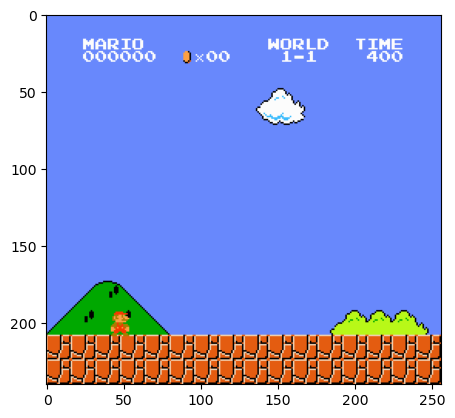

In [85]:
plt.imshow(images[1218])

In [7]:
import imageio
import numpy as np
images = []
obs = model.env.reset()
img = model.env.render()
done = True
while done:
    images.append(img)
    action, _ = model.predict(obs)
    obs, _, done ,_ = model.env.step(action)
    img = model.env.render()

imageio.mimsave("mario.gif", [img for i, img in enumerate(images)], fps=60)

C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


ValueError: Image is not numeric, but NoneType.

In [34]:
import gym
import imageio
import glob

# Load the pretrained model
#model = PPO.load("mario_1e6")

# Create an instance of the environment
#env = gym.make('SuperMarioBros-v0')

# Create a directory to store the images
gif_path = "./gif_images"

# Monitor the environment for the agent's actions
env = gym.wrappers.Monitor(env, gif_path, video_callable=lambda episode_id: True, force=True)

# Reset the environment
obs = env.reset()

# Run the agent for a certain number of steps
for i in range(100000):
  # Get the action from the agent
  action, _states = model.predict(obs)

  # Step the environment with the action
  obs, rewards, dones, info = env.step(action)

  # Check if the episode has ended
  if dones:
    break

# Close the environment
env.close()

# Use imageio to create the GIF
images = [imageio.imread(file) for file in glob.glob(gif_path + "/*.jpg")]
imageio.mimsave("super_mario_bros.gif", images, fps=60)

AttributeError: 'DummyVecEnv' object has no attribute 'spec'

In [12]:
pip install imageio-ffmpeg

     ---------------------------------------- 22.6/22.6 MB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
